Loading datasets...


/tmp/ipython-input-2254600616.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trades = pd.read_csv('historical_data.csv')


Data Successfully Merged! Total analysis rows: 55778


/tmp/ipython-input-2254600616.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, order=order_list, palette="RdYlGn")
/tmp/ipython-input-2254600616.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Size USD', estimator=np.mean, order=order_list, palette="Blues")


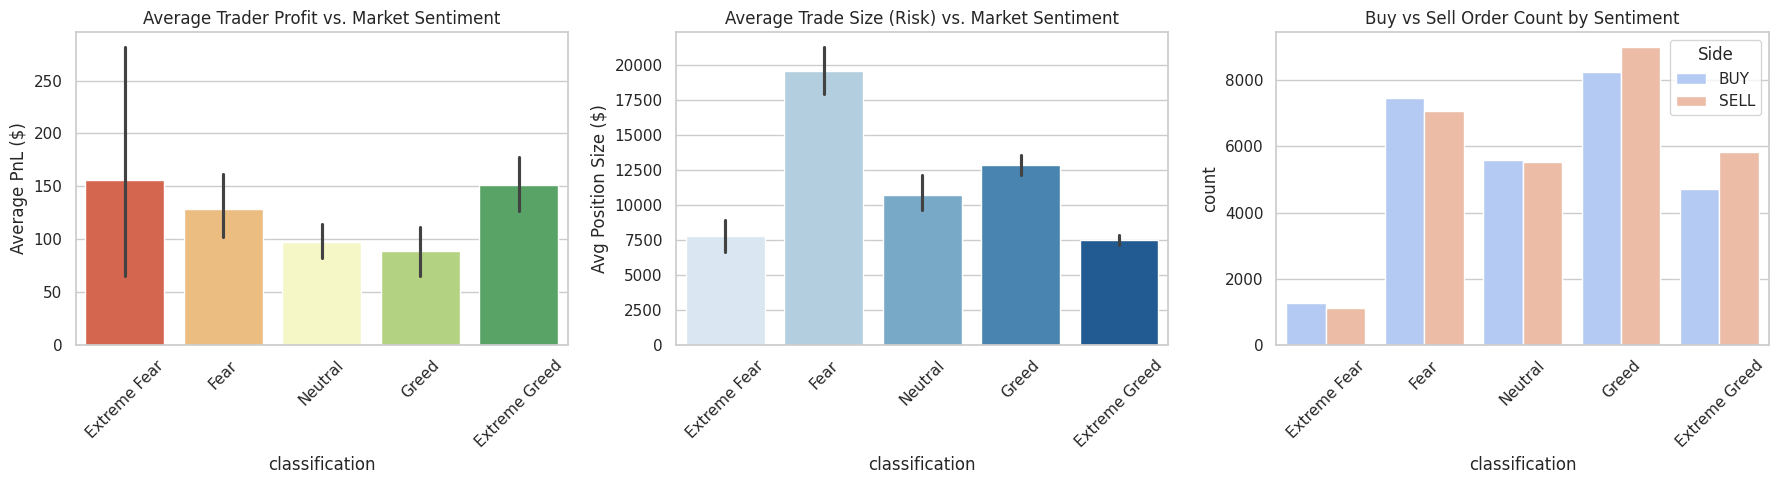


--- KEY INSIGHTS SUMMARY ---

1. Profitability per Sentiment Phase:
classification
Extreme Fear     155.533552
Extreme Greed    150.996045
Fear             128.173766
Neutral           97.386743
Greed             88.545211
Name: Closed PnL, dtype: float64

2. Risk Taking (Avg Size) per Sentiment Phase:
classification
Fear             19523.143638
Greed            12821.269269
Neutral          10699.058292
Extreme Fear      7729.308086
Extreme Greed     7463.084632
Name: Size USD, dtype: float64

3. Long/Short Ratio:
Side             BUY  SELL  Ratio (Buy/Sell)
classification                              
Extreme Fear    1255  1107          1.133695
Extreme Greed   4706  5827          0.807620
Fear            7468  7060          1.057790
Greed           8251  9005          0.916269
Neutral         5583  5516          1.012146


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- STEP 1: LOAD DATA ---
print("Loading datasets...")
df_sentiment = pd.read_csv('fear_greed_index.csv')
df_trades = pd.read_csv('historical_data.csv')

# --- STEP 2: DATA CLEANING & MERGING ---
# Convert sentiment date to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

# Convert trade timestamp to datetime
# Note: Using dayfirst=True because the sample data format '02-12-2024' (Dec 2nd) fits the context
df_trades['trade_time'] = pd.to_datetime(df_trades['Timestamp IST'], dayfirst=True)

# Extract just the date (YYYY-MM-DD) for merging
df_sentiment['date_only'] = df_sentiment['date'].dt.date
df_trades['date_only'] = df_trades['trade_time'].dt.date

# Merge datasets (Left Join on Trade Data)
merged_df = pd.merge(df_trades, df_sentiment, on='date_only', how='inner')
print(f"Data Successfully Merged! Total analysis rows: {len(merged_df)}")

# --- STEP 3: EXPLORATORY DATA ANALYSIS (EDA) ---

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# CHART 1: Average Profit (PnL) by Market Sentiment
plt.subplot(1, 3, 1)
order_list = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, order=order_list, palette="RdYlGn")
plt.title('Average Trader Profit vs. Market Sentiment')
plt.ylabel('Average PnL ($)')
plt.xticks(rotation=45)

# CHART 2: Risk Appetite (Trade Size) by Market Sentiment
plt.subplot(1, 3, 2)
sns.barplot(data=merged_df, x='classification', y='Size USD', estimator=np.mean, order=order_list, palette="Blues")
plt.title('Average Trade Size (Risk) vs. Market Sentiment')
plt.ylabel('Avg Position Size ($)')
plt.xticks(rotation=45)

# CHART 3: Buy/Sell Volume by Sentiment
plt.subplot(1, 3, 3)
sns.countplot(data=merged_df, x='classification', hue='Side', order=order_list, palette="coolwarm")
plt.title('Buy vs Sell Order Count by Sentiment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# --- STEP 4: GENERATE INSIGHTS SUMMARY ---
print("\n--- KEY INSIGHTS SUMMARY ---")
print("\n1. Profitability per Sentiment Phase:")
print(merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False))

print("\n2. Risk Taking (Avg Size) per Sentiment Phase:")
print(merged_df.groupby('classification')['Size USD'].mean().sort_values(ascending=False))

print("\n3. Long/Short Ratio:")
buy_sell = merged_df.groupby(['classification', 'Side']).size().unstack()
buy_sell['Ratio (Buy/Sell)'] = buy_sell['BUY'] / buy_sell['SELL']
print(buy_sell)